## Welcome to Algosoc, the soceity for algorithmic trading and quantitative finance at Imperial

### Who are we

We are founded in March 2018 with the aim to provide education and networking opportunities for students interested in algorithmic trading and quantitative finance. In 2018 and 2019 we organise the Algothon with Blackrock which is the flagship event of our soceity. Algothon 2020 was cancelled this year due to covid-19. Algothon 2021 was held online with Aspect Capital. 

http://www.algosoc.com/

#### Lecture 1: Understanding financial data

#### Price data


The most basic data to be dealt with in quantitative finance is price data, which represent how much a financial asset is worth at a given time. Traditionally (1990s), time series models such as ARIMA model are used widely in trading to capture trends in the market. Recently, the focus has moved to using deep learning models such as LSTM and CNN to learn more complicated behaviour.

https://reference.wolfram.com/language/ref/ARIMAProcess.html https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

Price data is determined by two charactereistics, frequency of data and types of data. Frequency of data can ranged from microseconds data (tick level) to end-of-date data (daily resolution). We will focus on data that have a minute resoluion or above. Major types of data include bar data, trade data and quote data.

In an exchange, quote data (Orderbook) is displayed for a stock in real time which has the bid and ask price (with size) submitted by different market participants. A trade is made if someone is willing the buy the security at the ask price (or sell the security at the bid price). Bar data is then aggregrated using the trade price and volume over an interval, which usually is a minute, an hour and a day.

https://iextrading.com/apps/tops/

In this notebook, we will illustrate various basic concepts in finance using the most famous ETF, SPDR S&P 500 (SPY) which keep tracks of the most important stock market index S&P 500 in the world. This ETF invest in the 500 biggest stocks listed in the US, weighted by market-cap. 

In [1]:
! pip install yfinance

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=439cea95ff5dc944e35c1365608c7ddb3eff37c1288424119b365ef00c8303f1
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [8]:
import yfinance as yf
import numpy as np
import pandas as pd

In [4]:
selected_etf = yf.Ticker("SPY")
hist = selected_etf.history(period="max")

A typical bar data would include Open, High, Low, Close and Volume within a time period, which is a trading day in the following example. As stocks can pay dividend and have splits, we usually use adjusted price to perform statistical analysis. From the adjusted price, we can derive the total return of the stock (which is the sum of price return and dividends, reinvested). 



In [6]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-15,443.200138,446.978044,442.023914,446.449738,78792200,0.000,0
2021-09-16,445.891519,446.928176,442.602039,445.742004,77786700,0.000,0
2021-09-17,444.920013,445.369995,441.019989,441.399994,118220200,1.428,0
2021-09-20,434.880005,436.559998,428.859985,434.040009,166445500,0.000,0
2021-09-21,436.529999,437.910004,433.070007,433.630005,92401800,0.000,0


Stock price are not stationary as they tend to grow over time. (Exception: Japanese stock market). 

For building models, it is better to use the log-return instead. Log-return is better than percentage return since it is additive over different time periods. 

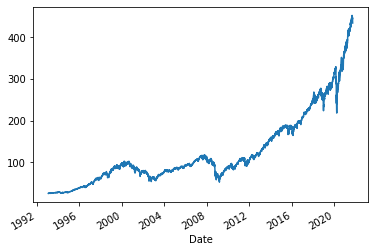

In [7]:
hist['Close'].plot()

In [9]:
## Calculating log-returns
hist['log_return'] = np.log(hist['Close']) - np.log(hist['Close'].shift(1))

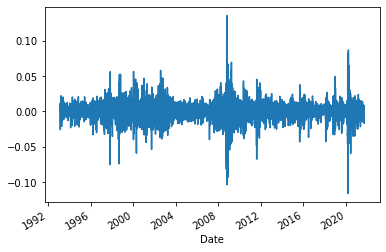

In [11]:
hist['log_return'].plot()

Statistical properties of stock market log-returns 

It has a positive mean, which is bigger than the average 10-year Treasury yield. This is called the risk premium of equity market

It has a negative skew, which demonstrates the fact the stock market experiences sharp drawdowns over a short period (2008,2020) 

It has a kurtosis greater than 3, suggesting it is more fat-tail than a normal distribution. 

The assumption of log-return following Gaussian distribution, as Brownian motion is the fundation of Black-Scholes Option pricing model. 

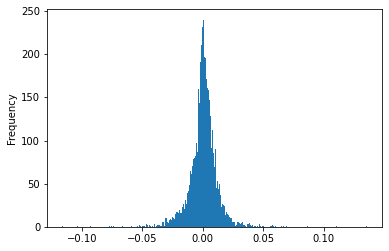

In [18]:
hist['log_return'].plot.hist(bins=500)

In [19]:
hist['log_return'].describe()

count    7213.000000
mean        0.000392
std         0.011826
min        -0.115887
25%        -0.004286
50%         0.000680
75%         0.005858
max         0.135577
Name: log_return, dtype: float64

In [20]:
hist['log_return'].skew()

-0.2996979086953324

In [21]:
hist['log_return'].kurtosis()

11.794835473313967

## Different measures of return 

We can separate the return of stock market into two parts. One as the close-to-open return (overnight return) and open-to-close return (intraday return) 

We can see intraday return has a mean close to zero, suggesting the mean-reversion nature of stock price during market hours. 

Most of the stock market return, for a buy-and-hold strategy in the long run, comes from holding stocks overnight. This can be considered as compensation of the risk to hold stocks overnight. 



In [22]:
hist['intraday_return'] = np.log(hist['Close']) - np.log(hist['Open'])
hist['overnight_return'] = np.log(hist['Open']) - np.log(hist['Close'].shift(1))

In [24]:
hist['intraday_return'].describe()

count    7214.000000
mean       -0.000005
std         0.009652
min        -0.094207
25%        -0.004137
50%         0.000427
75%         0.004579
max         0.088892
Name: intraday_return, dtype: float64

In [25]:
hist['overnight_return'].describe()

count    7213.000000
mean        0.000396
std         0.006731
min        -0.110357
25%        -0.002050
50%         0.000623
75%         0.003205
max         0.059519
Name: overnight_return, dtype: float64

### Volatility Scaling

We can measure the performance of a trading strategy by the sharpe ratio, which is ratio of excess return over to the volatility. 

Sharpe_Ratio = $\frac{r-r_f}{\sigma}$, where r is the return of the portfolio and $\sigma$ the standard deviation of the return of the portfolio. 

Volatility is detrimental to the long-term growth of capital as a strategy down 20% needs a 25% growth to recover. 

By adjusting our holdings of stock to constant volatility, so that we buy more during low volatility times and buy less during high volatility times. The Sharpe ratio can be improved compared to a constant buy-and-hold strategy.

Volatility plays an important role in portfolio construction and risk management. Risk parity, a famous hedge fund strategy aims to hold constant volatility exposure to different assets in the portfolio, rather than equal weighted. Banks are required to report their inventory risk at the end of time using VaR (Value at Risk) measures. 



In [26]:
hist['log_return'].mean() / hist['log_return'].std()

0.03311908396101132

In [27]:
hist['volatility'] = hist['log_return'].rolling(63).std()

In [29]:
hist['vol_adj_return'] = hist['log_return'] / hist['volatility'] 

In [31]:
## Improvement of Sharpe ratio of constant vol strategy 
hist['vol_adj_return'].mean() / hist['vol_adj_return'].std()

0.04877588033928312

## Recommended readings 

- Algorithmic Trading: Winning Strategies and Their Rationale, Ernest P. Chan

- Advances in Financial Machine Learning, Marcos López de Prado

- A Complete Guide to the Futures Market: Technical Analysis, Trading Systems, Fundamental Analysis, Options, Spreads, and Trading Principles (Wiley Trading), Jack D. Schwager